In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("main_crop_yield_prediction.csv")
data.head()

,Unnamed: 0,Area,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide (tonnes),Item,hg/ha yield
0,0,Angola,1991,1010,24.02,79.0,Bananas,44256
1,1,Angola,1991,1010,24.02,79.0,"Beans, dry",2727
2,2,Angola,1991,1010,24.02,79.0,Cocoa beans,798
3,3,Angola,1991,1010,24.02,79.0,"Coffee, green",909
4,4,Angola,1991,1010,24.02,79.0,Maize (corn),4013


In [3]:
print(data.columns)

Index(['Unnamed: 0', 'Area', 'Year', 'average_rain_fall_mm_per_year',
       'avg_temp', 'Pesticide (tonnes)', 'Item', 'hg/ha yield'],
      dtype='object')


In [4]:
data = data.loc[:, ~data.columns.str.contains('Unnamed: 0')]
print(data.columns)

Index(['Area', 'Year', 'average_rain_fall_mm_per_year', 'avg_temp',
       'Pesticide (tonnes)', 'Item', 'hg/ha yield'],
      dtype='object')


In [5]:
data.head()

,Area,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide (tonnes),Item,hg/ha yield
0,Angola,1991,1010,24.02,79.0,Bananas,44256
1,Angola,1991,1010,24.02,79.0,"Beans, dry",2727
2,Angola,1991,1010,24.02,79.0,Cocoa beans,798
3,Angola,1991,1010,24.02,79.0,"Coffee, green",909
4,Angola,1991,1010,24.02,79.0,Maize (corn),4013


In [6]:
data.shape

(5439, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5439 entries, 0 to 5438
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5439 non-null   object 
 1   Year                           5439 non-null   int64  
 2   average_rain_fall_mm_per_year  5439 non-null   int64  
 3   avg_temp                       5439 non-null   float64
 4   Pesticide (tonnes)             5439 non-null   float64
 5   Item                           5439 non-null   object 
 6   hg/ha yield                    5439 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 297.6+ KB


In [8]:
data.isnull().sum()

Area                             0
Year                             0
average_rain_fall_mm_per_year    0
avg_temp                         0
Pesticide (tonnes)               0
Item                             0
hg/ha yield                      0
dtype: int64

In [9]:
data.duplicated().sum()

260

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.nunique()

Area                               10
Year                               29
average_rain_fall_mm_per_year      10
avg_temp                          288
Pesticide (tonnes)                131
Item                               12
hg/ha yield                      2586
dtype: int64

In [12]:
data.Item.value_counts()

Maize (corn)             523
Rice                     523
Tomatoes                 523
Potatoes                 494
Seed cotton, unginned    494
Wheat                    465
Soya beans               445
Coffee, green            428
Cocoa beans              343
Yams                     340
Beans, dry               305
Bananas                  296
Name: Item, dtype: int64

In [13]:
data.describe()

,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide (tonnes),hg/ha yield
count,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000
mean,2005.960417,1001.639892,23.651969,4570.453180,54477.302182
std,8.788763,292.433258,4.235068,9217.919177,109383.159626
min,1991.000000,495.000000,14.980000,0.870000,540.000000
25%,1998.000000,848.000000,20.730000,24.750000,8711.500000
50%,2007.000000,1150.000000,25.760000,62.000000,16700.000000
75%,2014.000000,1150.000000,27.090000,1578.000000,53505.500000
max,2020.000000,1646.000000,29.710000,26857.000000,790917.000000


In [14]:
data.describe(include=object)

,Area,Item
count,5179,5179
unique,10,12
top,Nigeria,Maize (corn)
freq,1970,523


In [15]:
data.groupby(['Item'], sort=True)['hg/ha yield'].sum().nlargest(10)

Item
Tomatoes                 90158574
Bananas                  57571226
Potatoes                 57249951
Yams                     31177988
Rice                     10157504
Maize (corn)              9836387
Wheat                     8298342
Seed cotton, unginned     5453155
Soya beans                4678154
Coffee, green             3663740
Name: hg/ha yield, dtype: int64

In [16]:
data.groupby(['Area'], sort=True)['hg/ha yield'].sum().nlargest(10)

Area
South Africa    137089765
Nigeria          57193444
Kenya            19656544
Ethiopia         11791843
Mozambique       11401305
Tanzania         10601915
Ghana            10309758
Angola            9388783
Congo             8223716
Uganda            6480875
Name: hg/ha yield, dtype: int64

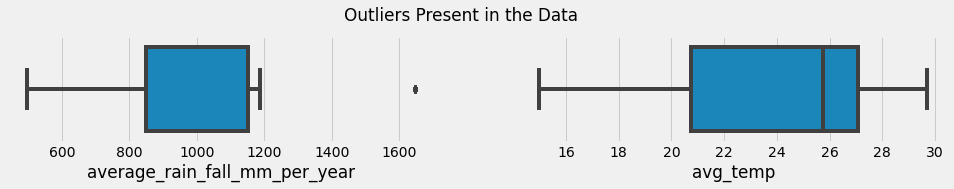

In [19]:
# univariate analysis on numerical columns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(2, 2, 1)
sns.boxplot(data['average_rain_fall_mm_per_year'])

plt.subplot(2, 2, 2)
sns.boxplot(data['avg_temp'])


plt.suptitle('Outliers Present in the Data')
plt.show()

<AxesSubplot:xlabel='avg_temp', ylabel='Density'>

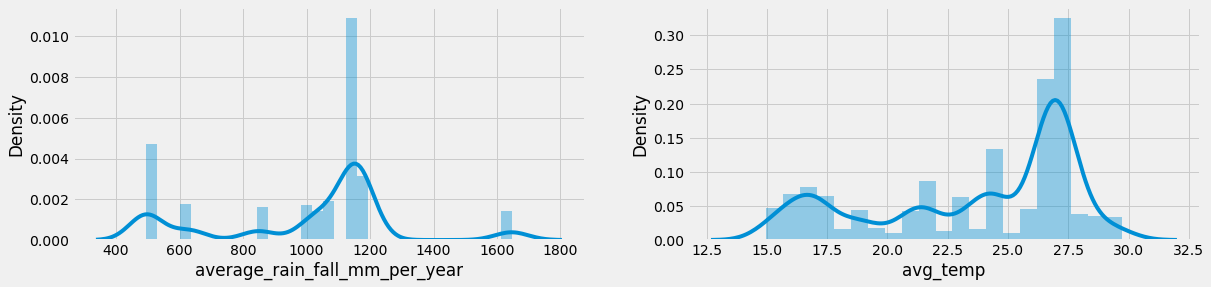

In [20]:
#Univariate Analysis on numerical column
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['average_rain_fall_mm_per_year'])

plt.subplot(1, 2, 2)
sns.distplot(data['avg_temp'])

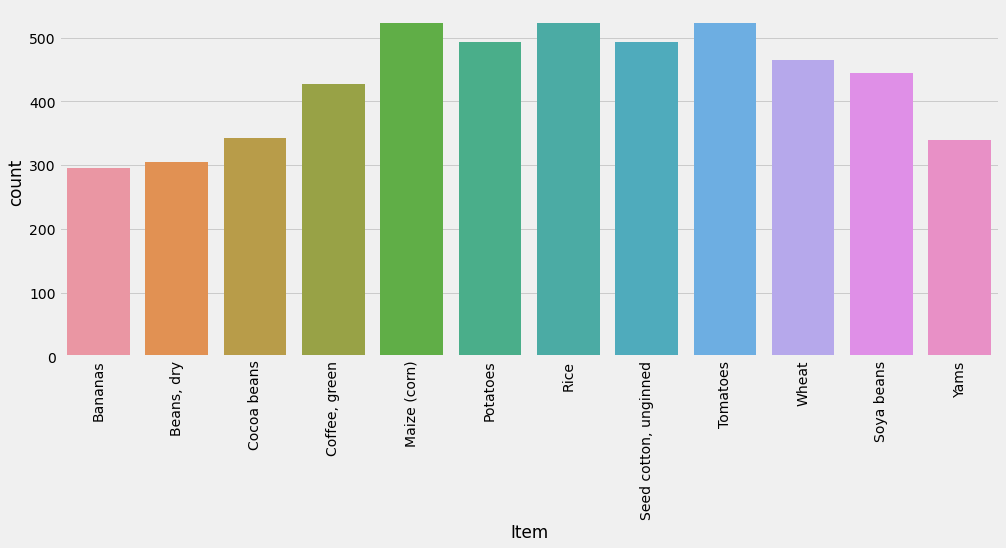

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data['Item'])
plt.xticks(rotation = 90)
plt.show()

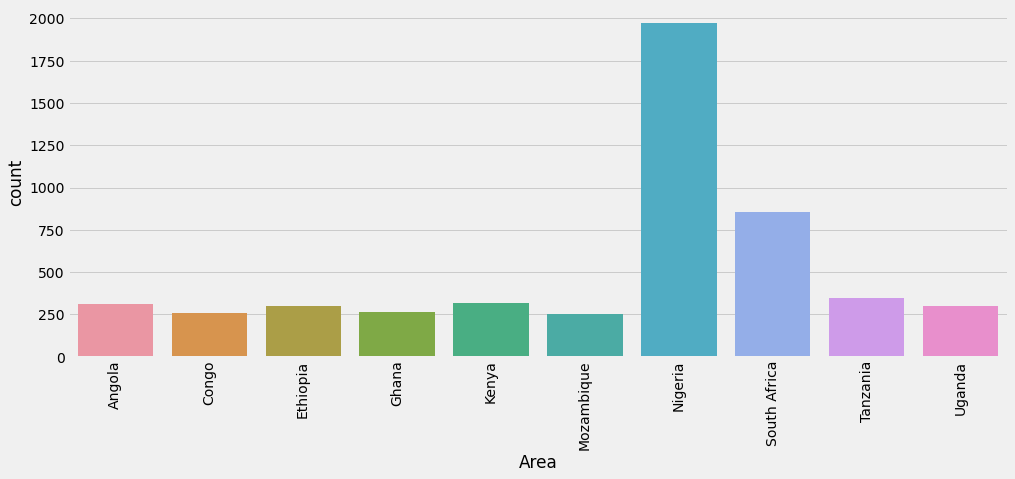

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data['Area'])
plt.xticks(rotation = 90)
plt.show()

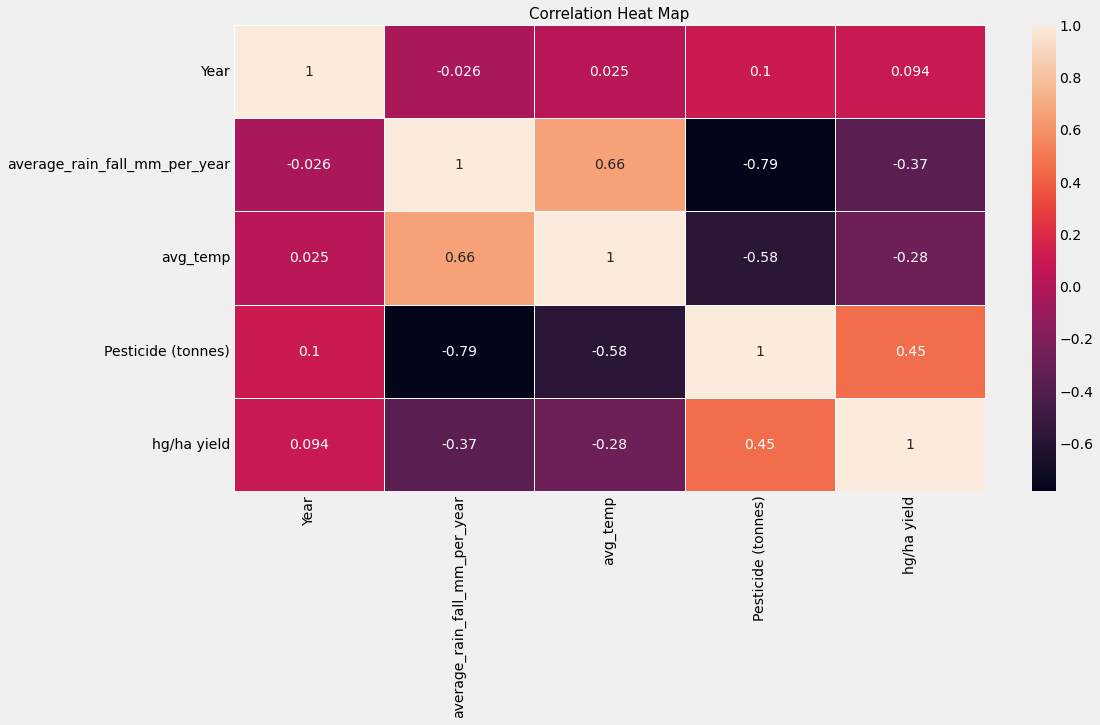

In [23]:
# multivariate analysis
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, linewidths=.5)
plt.title('Correlation Heat Map', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [24]:
data.Item.value_counts()

Maize (corn)             523
Rice                     523
Tomatoes                 523
Potatoes                 494
Seed cotton, unginned    494
Wheat                    465
Soya beans               445
Coffee, green            428
Cocoa beans              343
Yams                     340
Beans, dry               305
Bananas                  296
Name: Item, dtype: int64

In [25]:
data['Item'] = data['Item'].replace({'Maize (corn)':'Maize', 'Seed cotton, unginned':'Seed cotton','Coffee, green':'Coffee','Beans, dry':'Beans'})